In [1]:
import keras
from keras import layers
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [8]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

313/313 [==============================] - 1s 2ms/step


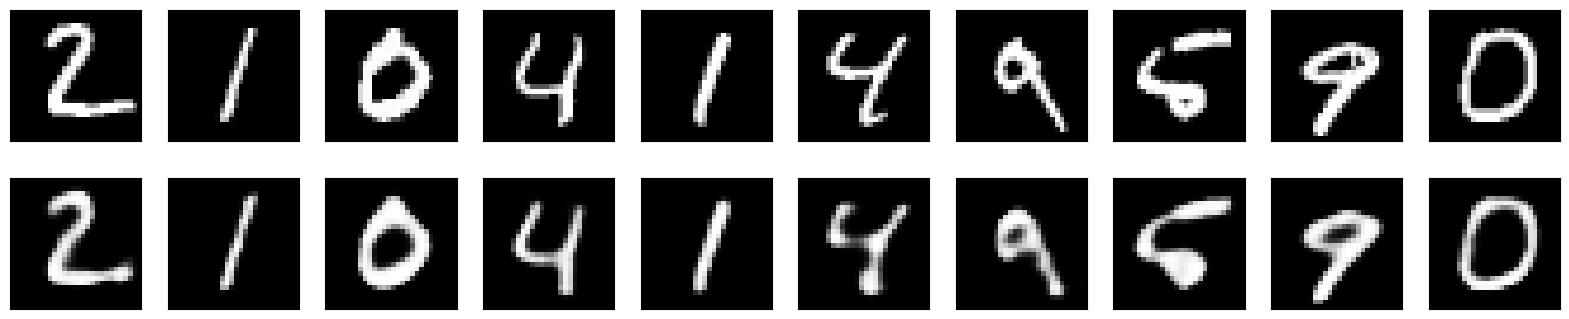

In [7]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [3]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584   

In [41]:
input_img = keras.Input(shape=(28, 28, 1))
#bottle_neck = 100
bottle_neck = 100

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Flatten()(x)
encoded = layers.Dense(bottle_neck, activation='relu')(x)


# at this point the representation is (4, 4, 8) i.e. 128-dimensional

d = layers.Dense(256, activation='relu', input_shape=(bottle_neck,))(encoded)
d = layers.Reshape((8,8,4))(d)
d = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(d)
d = layers.UpSampling2D((2, 2))(d)
d = layers.Conv2D(8, (3, 3), activation='relu', padding='valid')(d)
d = layers.UpSampling2D((2, 2))(d)
d = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(d)
decoded = d

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

encoder = keras.Model(input_img, encoded)


encoded_input = keras.Input(shape=(bottle_neck,))  # Shape matches the bottleneck
x = encoded_input
for layer in autoencoder.layers[-7:]:  # Adjust the range as needed
    x = layer(x)

decoder = keras.Model(encoded_input, x)



In [42]:
decoder.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_7 (Dense)             (None, 256)               25856     
                                                                 
 reshape_3 (Reshape)         (None, 8, 8, 4)           0         
                                                                 
 conv2d_21 (Conv2D)          (None, 8, 8, 8)           296       
                                                                 
 up_sampling2d_6 (UpSampling  (None, 16, 16, 8)        0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 8)         584       
                                                          

In [5]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [44]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 2s 6ms/step - loss: 0.0825 - val_loss: 0.0817
Epoch 2/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0825 - val_loss: 0.0816
Epoch 3/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0823 - val_loss: 0.0818
Epoch 4/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0823 - val_loss: 0.0820
Epoch 5/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0823 - val_loss: 0.0813
Epoch 6/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0822 - val_loss: 0.0816
Epoch 7/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0822 - val_loss: 0.0813
Epoch 8/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0821 - val_loss: 0.0812
Epoch 9/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0821 - val_loss: 0.0813
Epoch 10/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0820 - val_lo

In [17]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


In [46]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 1ms/step


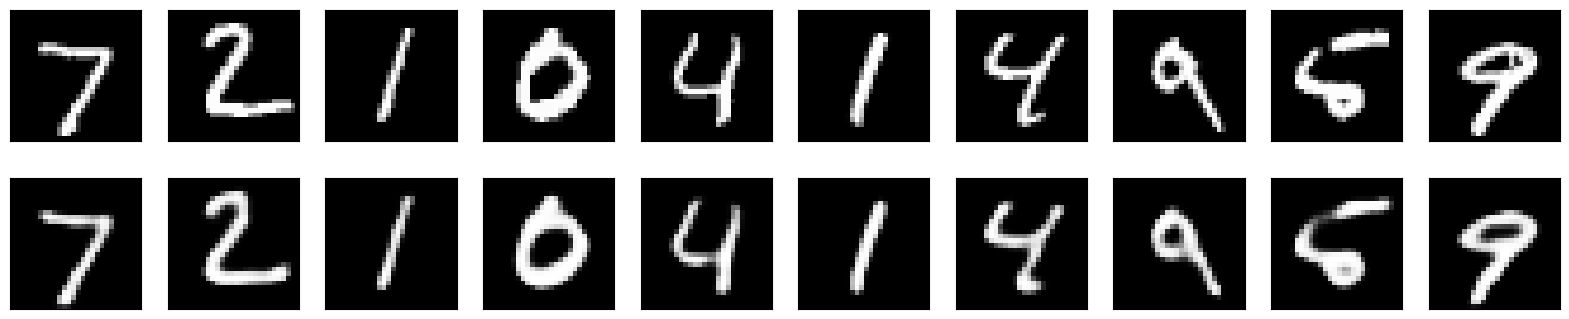

In [47]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [76]:
autoencoder.layers[-7].weights

[<tf.Variable 'dense_37/kernel:0' shape=(100, 256) dtype=float32, numpy=
 array([[-0.14136717,  0.15842658,  0.08662361, ...,  0.06106624,
          0.03150683, -0.04678136],
        [-0.00100974, -0.07380592,  0.08611279, ..., -0.12328318,
         -0.11961971, -0.09756553],
        [-0.0175764 ,  0.37367204, -0.04928469, ..., -0.12679368,
         -0.09400386, -0.15286098],
        ...,
        [ 0.06427953,  0.10001442,  0.08481194, ...,  0.09225887,
          0.00787264,  0.06276934],
        [ 0.03545003,  0.13217019, -0.10933516, ...,  0.01965261,
         -0.03207771,  0.014554  ],
        [-0.03970597, -0.35132226, -0.02247722, ...,  0.3921775 ,
         -0.04382756,  0.1772918 ]], dtype=float32)>,
 <tf.Variable 'dense_37/bias:0' shape=(256,) dtype=float32, numpy=
 array([-1.91877466e-02,  1.53531954e-01, -2.68591158e-02, -4.71024439e-02,
        -5.30096553e-02, -1.11371512e-02, -1.18419491e-02,  2.92068999e-02,
        -1.72040537e-01,  6.13397397e-02,  1.08488627e-01, -1.318

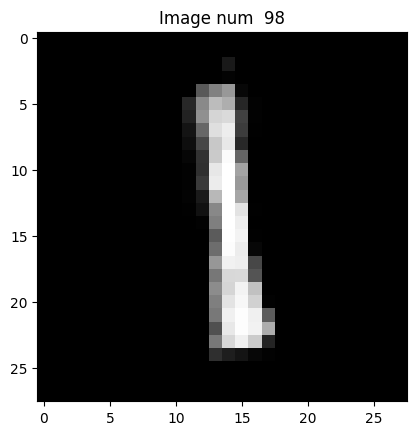

1/1 [==============================] - 0s 15ms/step


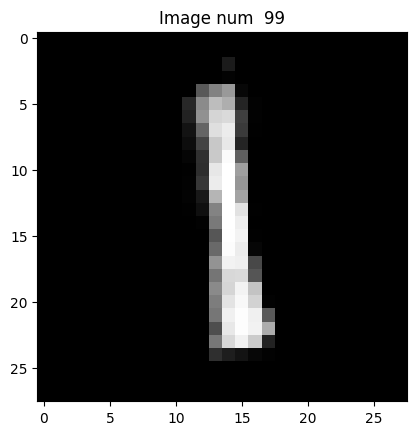

In [40]:
from IPython import display
from IPython.display import Image as IPythonImage

for i in range(100):
    display.clear_output(wait=True)
    display.display(plt.gcf())
    #noise = np.random.rand(1,100)
    noise = np.zeros((1,bottle_neck))
    noise[0][0]=i/4.0
    decoded_noise = decoder.predict(noise)
    plt.title("Image num {:3}".format(i))
    plt.imshow(decoded_noise[0].reshape(28, 28))

In [38]:
np.min(encoded_imgs)

0.0